# Homework sheet 0: Data-IO

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise H0.1 Loading and Describing Data with Pandas

a) Read "LaborSupply1988.csv" into a pandas dataframe.

In [2]:
df = pd.read_csv("LaborSupply1988.csv")
df.head()

,lnhr,lnwg,kids,age,disab
0,7.82,1.98,2,36,0
1,7.63,1.79,0,44,0
2,7.62,2.64,0,35,1
3,8.01,1.98,2,31,0
4,7.73,2.56,2,41,0


b) Determine the amount of attributes and datapoints inside the dataframe.

In [3]:
df.shape

(532, 5)

c) Which attributes does the dataset have?

In [4]:
df.columns

Index(['lnhr', 'lnwg', 'kids', 'age', 'disab'], dtype='object')

d) Have a look at the first 10 datapoints.

In [9]:
df.head(10)

,lnhr,lnwg,kids,age,disab
0,7.82,1.98,2,36,0
1,7.63,1.79,0,44,0
2,7.62,2.64,0,35,1
3,8.01,1.98,2,31,0
4,7.73,2.56,2,41,0
5,7.69,2.76,1,40,0
6,8.35,2.45,2,53,0
7,7.69,2.18,0,46,0
8,7.67,2.79,2,36,0
9,7.74,2.93,0,55,0


e) Determine the value range of the attribute "age".

In [11]:
df.age.min(), df.age.max()

(31, 60)

f) Compute the average of log annual hours (lnhr) worked by the labourers with 0, 1, . . ., 6 kids each.
Hint: .groupby()

In [21]:
df.groupby("kids").lnhr.mean()

kids
0    7.640549
1    7.681368
2    7.713586
3    7.678415
4    7.724500
5    7.760000
6    7.895000
Name: lnhr, dtype: float64

g) Compute the average number of kids of the 40 year olds.

In [37]:
print(f"{df[df.age == 40].kids.mean():.4}")

1.971


## Exercise H0.2 Plotting Data with Pandas and Matplotlib.Pyplot

a) Read "LaborSupply1988.csv" into a pandas dataframe.

In [4]:
df = pd.read_csv("LaborSupply1988.csv")
df.head()

,lnhr,lnwg,kids,age,disab
0,7.82,1.98,2,36,0
1,7.63,1.79,0,44,0
2,7.62,2.64,0,35,1
3,8.01,1.98,2,31,0
4,7.73,2.56,2,41,0


b) Plot a histogram of the attribute "age". Which is the most frequent age?

most common age: 39


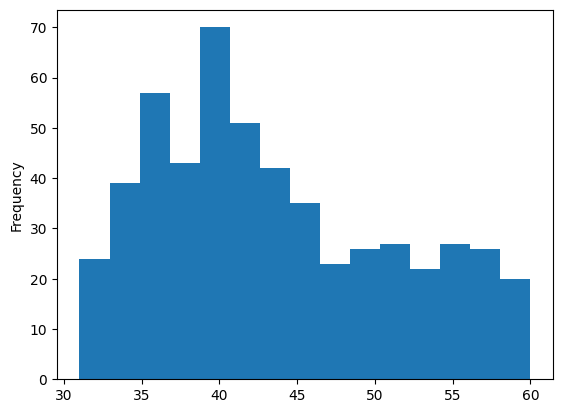

In [23]:
df.age.plot.hist(bins=15)
print(f"most common age: {int(df.age.mode())}")

c) Plot the average number of "kids" against "age" and interpret the resulting graph. Compute the
correlation of "kids" and "age" to check your interpretation.

<AxesSubplot:xlabel='age'>

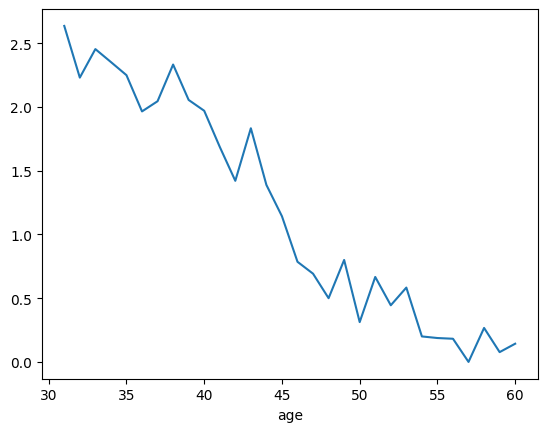

In [30]:
df.groupby("age")["kids"].mean().plot()

In [58]:
corr = df[["kids", "age"]].corr().kids.age
print(f"{corr:0.3}")

# --> correlation between age and kids is negative, meaning the avg number of kids
#  decreases with increasing age.

-0.64


d) Plot the "log of hourly wage (lnwg)" against "age".

<AxesSubplot:xlabel='age'>

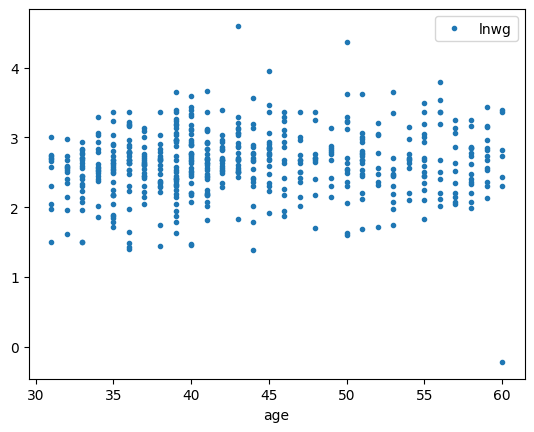

In [42]:
df.plot(x="age", y="lnwg", style=".")

e) Plot the mean of the "log of hourly wage (lnwg)" against "age". Compute and discuss the type of
correlation between "lnwg" and "age".

<AxesSubplot:xlabel='age'>

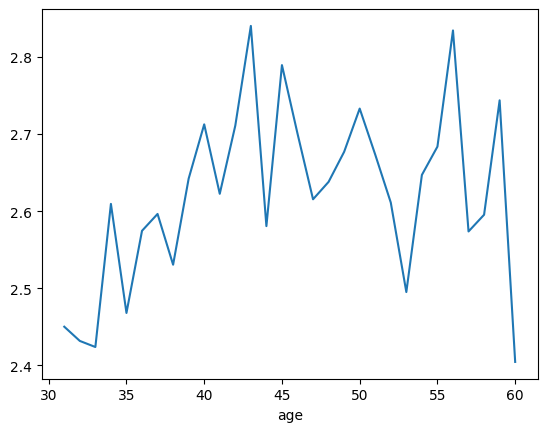

In [43]:
df.groupby("age")["lnwg"].mean().plot()

In [61]:
corr = df[["lnwg", "age"]].corr().lnwg.age
print(f"{corr:0.3}")

0.094


f) Plot "lnhr" against "age" with different colors for "disab=0" and "disab=1".

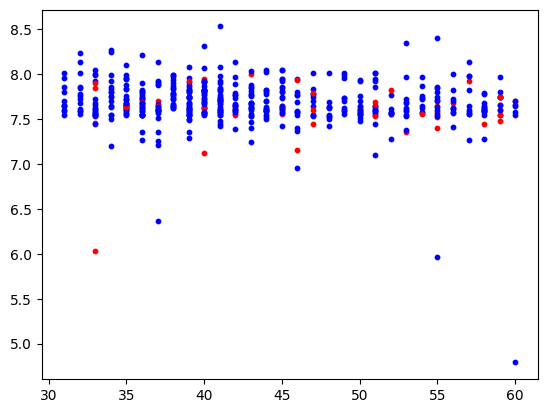

In [72]:
Xs = df["age"].values
Ys = df["lnhr"].values
filterfunction = lambda x : "blue" if x == 0 else "red"
colors = df["disab"].apply(filterfunction).values
for x, y, c in zip(Xs, Ys, colors):
    plt.scatter(x, y, s=10, color=c)
plt.show()

g) Plot a boxplot of "lnhr" against "kids". What can be observed regarding median and variance? Is the
observation meaningful for large values of kids?

<AxesSubplot:title={'center':'lnhr'}, xlabel='kids'>

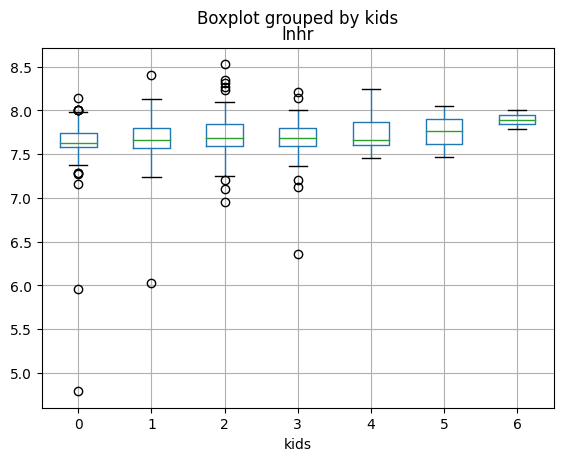

In [75]:
df.boxplot(column=["lnhr"], by="kids")